**使用Linear Regression預估第二型糖尿病之疾病進程**

In [142]:
from sklearn import datasets 
import pandas as pd
#Load DM dataset 
DM = datasets.load_diabetes() 
DM

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [144]:
# Rename columns for better understanding
data = pd.DataFrame(DM.data, columns=DM.feature_names)
data.rename(columns={
    's1': 'TC',
    's2': 'LDL',
    's3': 'HDL',
    's4': 'TC_HDL_R',
    's5': 'log_TG',
    's6': 'BS',
        }, inplace=True)
print(data)

          age       sex       bmi        bp        TC       LDL       HDL  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

     TC_HDL_R    log_TG        BS  
0   -0.002592  0.019907 -0.017646  
1  

In [33]:
data['Dx_prog'] = DM.target  # Add the target variable
data

,age,sex,bmi,bp,TC,LDL,HDL,TC_HDL_R,log_TG,BS,Dx_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [41]:
# Use multiple features; I decided Xs are age, bmi, TC and BS based on clinical rationale
X = data[['age', 'bmi', 'TC','BS']]  # Include potential variables
Y = data['Dx_prog']  # Target variable remains the same
X.shape, Y.shape

((442, 4), (442,))

In [43]:
#Data split to prepare LR
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20) #80% vs. 20%

In [49]:
#check the data dimension
x_train.shape, y_train.shape


((353, 4), (353,))

In [51]:
x_test.shape, y_test.shape

((89, 4), (89,))

In [53]:
#for later use, import mse and r^2
from sklearn.metrics import mean_squared_error, r2_score


In [151]:
#Assign LR to model 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()

In [153]:
#build training model
model.fit(x_train, y_train)

LinearRegression()

In [155]:
print('coeffectients:', model.coef_)
print('intercept:', model.intercept_)

coeffectients: [ 47.52533168 870.88544553  59.25704654 223.5455686 ]
intercept: 154.23754381022715


Y = 154.23754381022715 + 47.52533168*age + 870.88544553*bmi + 59.25704654*TC + 223.5455686*BS

In [158]:
#make a prediction
y_pred = model.predict(x_test)

In [164]:
#Evaluate at the model 
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MSE: 4323.622318386376
R^2: 0.2730530308944924


In [170]:
#The R^2 and MSR are not ideal, so I decided to change the Xs
X_new = data[['BS', 'bmi', 'log_TG','age','sex'] ] #change the Xs
data['Dx_prog'] = DM.target
Y = data['Dx_prog'] 
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(X_new, Y, test_size=0.2, random_state=20)

In [172]:
#check the data dimension
x_new_train.shape, y_new_train.shape

((353, 5), (353,))

In [174]:
#build training model
model.fit(x_new_train, y_new_train)

LinearRegression()

In [176]:
print('coeffectients_v2:', model.coef_)
print('intercept_v2:', model.intercept_)

coeffectients_v2: [  89.54573502  708.88534615  564.88315839   -2.01825342 -115.47662062]
intercept_v2: 154.08364321832963


Y_v2 = 154.08364321832963 + 89.54573502xBS + 708.88534615xbmi + 564.88315839xlog_TG -2.01825342xage -115.47662062xsex

In [179]:
#make a prediction
y_new_pred = model.predict(x_new_test)

In [181]:
#Evaluate at the model 
print('MSE_v2:', mean_squared_error(y_new_test, y_new_pred))
print('R^2_v2:', r2_score(y_new_test, y_new_pred))

MSE_v2: 3672.4158067246044
R^2_v2: 0.3825428440775668


<Axes: >

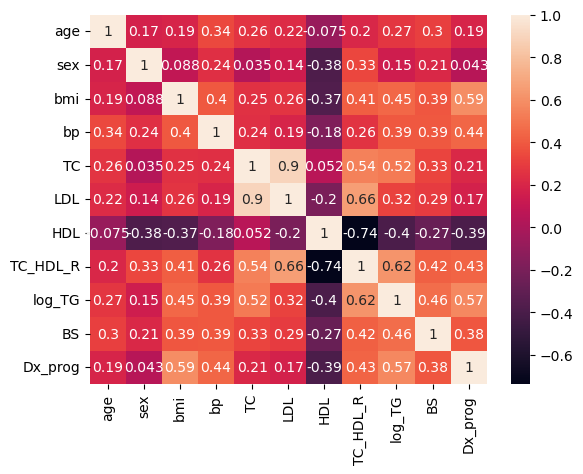

In [183]:
#I still feel like MSE is large, so I want to re-model
#Feature selection
corr = data.corr()
sns.heatmap(corr, annot=True)

In [185]:
#The R^2 and MSR are not ideal, so I decided to change the Xs
X_new2 = data[['age','bmi','bp','TC_HDL_R','log_TG','BS'] ] #change the Xs
Y = data['Dx_prog'] 
x_new2_train, x_new2_test, y_new2_train, y_new2_test = train_test_split(X_new2, Y, test_size=0.2, random_state=20)

In [187]:
#check the data dimension
x_new2_train.shape, y_new2_train.shape

((353, 6), (353,))

In [189]:
#build training model
model.fit(x_new2_train, y_new2_train)

LinearRegression()

In [191]:
print('coeffectients_v3:', model.coef_)
print('intercept_v3:', model.intercept_)

coeffectients_v3: [-75.15314209 645.36355799 285.50182007  51.58969573 475.14564525
  21.49388967]
intercept_v3: 153.81043467225766


Y_v3 = 153.81043467225766 -75.15314209xage +645.36355799xbmi + 285.50182007xbp + 51.58969573xTC_HDL_R + 475.14564525xlog_TG + 21.49388967xBS

In [194]:
#make a prediction
y_new2_pred = model.predict(x_new2_test)

In [196]:
#Evaluate the model 
print('MSE_v3:', mean_squared_error(y_new2_test, y_new2_pred))
print('R^2_v3:', r2_score(y_new2_test, y_new2_pred))

MSE_v3: 3604.314131877867
R^2_v3: 0.39399303617929515


In [ ]:
Y_v3 = 153.81043467225766 -75.15314209*age +645.36355799*bmi + 285.50182007*bp + 51.58969573*TC_HDL_R + 475.14564525*log_TG + 21.49388967*BS